In [2]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import config
os.chdir(config.LOOP_CATALOG_DIR)
sns.set_theme(style="whitegrid")
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

In [45]:
samples = pd.read_table('results/samplesheets/hicpro/current.hicpro.samplesheet.without_header.tsv', header=None)
columns = ['std_sample_name', 'gse_id', 'organism', 'bio_rep', 'antibody_target', 'restriction_enzyme', 'sample_name']
samples.columns = columns

# Helper Functions

#### read chip-seq peaks files

In [46]:
def read_chipseq_files(file):
    peak_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            info = line.strip().split()
            peak_info = info[0:3]
            peak_data[count] = peak_info
            count = count + 1
    return(peak_data)

In [47]:
def get_chipseq_path(dy):
    tpl = os.path.join(dy, 'MACS2_Ext_*/*.macs2_peaks.narrowPeak_Q0.01filt')
    path = glob.glob(tpl)[0]
    return(path) 

#### generate pandas dataframe 

In [48]:
def generate_df():
    data = []
    glob_str = 'results/peaks/chipline_v2/*'
    
    for dy in glob.glob(glob_str):
    
        # get sample_name
        sample_name = os.path.basename(dy)
        
        # skip non-sample files
        if sample_name in ['logs/', 'logs', 'main']:
            continue
            
        # append sample_name
        sample_info = []
        sample_info.append(sample_name)
        
        ## get the number of peaks
        chip_path = get_chipseq_path(dy)
        
        print(chip_path)
        
        peak_info = read_chipseq_files(chip_path)
        sample_info.append(len(peak_info))
        
        # extract peak sizes
        peak_sizes = []
        for peak in peak_info.items():
            peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
        sample_info.append(np.mean(peak_sizes))
        sample_info.append(os.path.basename(chip_path))

        # append to the larger data
        data.append(sample_info)
            
    df = pd.DataFrame(data)
    return df

# Generate Pandas Dataframe

In [ ]:
df = generate_df()

In [51]:
df

,0,1,2,3
0,L2-3-Kdm5d-KO.GSE232457.Mus_musculus.H3K27ac.b1,57954,569.997619,L2-3-Kdm5d-KO.GSE232457.Mus_musculus.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
1,22RV1.GSE200160.Homo_Sapiens.CTCF.b1,147535,714.105473,22RV1.GSE200160.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
2,HCT116-FOXD2.GSM5904695.Homo_Sapiens.H3K4me3.b1,49728,1036.232444,HCT116-FOXD2.GSM5904695.Homo_Sapiens.H3K4me3.b1.macs2_peaks.narrowPeak_Q0.01filt
3,HCT116.GSM5904695.Homo_Sapiens.H3K4me1.b1,191534,1137.628484,HCT116.GSM5904695.Homo_Sapiens.H3K4me1.b1.macs2_peaks.narrowPeak_Q0.01filt
4,U3078-GBM.GSE217344.Homo_Sapiens.H3K4me3.b1,46905,1142.989916,U3078-GBM.GSE217344.Homo_Sapiens.H3K4me3.b1.macs2_peaks.narrowPeak_Q0.01filt
5,U3028-GBM.GSE217344.Homo_Sapiens.H3K4me3.b1,80914,968.007959,U3028-GBM.GSE217344.Homo_Sapiens.H3K4me3.b1.macs2_peaks.narrowPeak_Q0.01filt
6,stembryos-120h.GSE205779.Mus_musculus.H3K27ac.b1,165655,760.190203,stembryos-120h.GSE205779.Mus_musculus.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
7,U3008-GBM.GSE217344.Homo_Sapiens.H3K4me3.b1,157746,754.108719,U3008-GBM.GSE217344.Homo_Sapiens.H3K4me3.b1.macs2_peaks.narrowPeak_Q0.01filt
8,U3039-GBM.GSE217344.Homo_Sapiens.H3K4me3.b1,92974,606.053606,U3039-GBM.GSE217344.Homo_Sapiens.H3K4me3.b1.macs2_peaks.narrowPeak_Q0.01filt
9,U3118-GBM.GSE217344.Homo_Sapiens.H3K4me3.b1,85582,1122.626195,U3118-GBM.GSE217344.Homo_Sapiens.H3K4me3.b1.macs2_peaks.narrowPeak_Q0.01filt


In [53]:
df.columns = ["sample_name", "num_peaks_hichip_peaks","avg_peak_size_hichip_peaks", "num_peaks_fithichip"]
#df.columns = ["sample_name", "num_peaks_hichip_peaks","avg_peak_size_hichip_peaks", "num_peaks_fithichip","avg_peak_size_fithichip", "num_peaks_chipseq","avg_peak_size_chipseq", "chipseq_path"]
df = df.sort_values(by=["sample_name"], ascending=True).reset_index(drop=True)
df

,sample_name,num_peaks_hichip_peaks,avg_peak_size_hichip_peaks,num_peaks_fithichip
0,22RV1-Control.GSE200160.Homo_Sapiens.H3K27ac.b1,168246,1109.312834,22RV1-Control.GSE200160.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
1,22RV1-Myc.GSE200160.Homo_Sapiens.CTCF.b1,139264,686.300659,22RV1-Myc.GSE200160.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
2,22RV1-Myc.GSE200160.Homo_Sapiens.H3K27ac.b1,174516,971.548930,22RV1-Myc.GSE200160.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
3,22RV1.GSE200160.Homo_Sapiens.CTCF.b1,147535,714.105473,22RV1.GSE200160.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
4,BMDC-CTCF_cKO-LPS.GSE185880.Mus_musculus.H3K27ac.b1,2829,504.074938,BMDC-CTCF_cKO-LPS.GSE185880.Mus_musculus.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
5,BMDC-CTCF_cKO.GSE185880.Mus_musculus.H3K27ac.b1,43050,557.478142,BMDC-CTCF_cKO.GSE185880.Mus_musculus.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
6,BMDC-JSH-JSH-LPS.GSE185880.Mus_musculus.H3K27ac.b1,214756,979.582894,BMDC-JSH-JSH-LPS.GSE185880.Mus_musculus.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
7,BMDC-JSH.GSE185880.Mus_musculus.H3K27ac.b1,210499,1021.500278,BMDC-JSH.GSE185880.Mus_musculus.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
8,BMDC-LPS.GSE185880.Mus_musculus.H3K27ac.b1,193957,1116.166145,BMDC-LPS.GSE185880.Mus_musculus.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
9,BMDC-WT-LPS.GSE185880.Mus_musculus.H3K27ac.b1,123333,715.937916,BMDC-WT-LPS.GSE185880.Mus_musculus.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt


In [58]:
human_df = df.loc[df.sample_name.str.contains('Homo_Sapiens')]

In [59]:
mouse_df = df.loc[df.sample_name.str.contains('Mus_musculus')]

In [7]:
df_t2t = pd.read_excel("tables/human_t2t.peaks_04.04.23.xlsx")
df_hg38 = pd.read_excel("tables/human_hg38.peaks_04.04.23.xlsx")
df_mm10 = pd.read_excel("tables/mouse_mm10.peaks_04.04.23.xlsx")

df_t2t = df_t2t.drop(columns=["Unnamed: 0"])
df_hg38 = df_hg38.drop(columns=["Unnamed: 0"])
df_mm10 = df_mm10.drop(columns=["Unnamed: 0"])

In [8]:
df_hg38

,sample_name,num_peaks_hichip_peaks,avg_peak_size_hichip_peaks,num_peaks_fithichip,avg_peak_size_fithichip,num_peaks_chipseq,avg_peak_size_chipseq,chipseq_path
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,968,18837.628099,29430,174.444852,90971,547.053676,293T-PDS.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,1801,29690.376458,73184,187.952298,93587,549.467747,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
2,293T.GSE128106.Homo_Sapiens.YY1.b1,43,21189.976744,987,183.697062,119725,500.863337,293T.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,2661,1281.321308,11489,265.430151,115154,630.902669,A673-siCT-Dh1-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,3468,1323.91436,10428,255.292386,115154,630.902669,A673-siCT-Dh1-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,823,1086.36695,7761,265.823734,102935,615.880789,A673-siSA2-Dh6-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,2205,1375.680726,23228,247.107327,102935,615.880789,A673-siSA2-Dh6-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,49,2554.061224,9018,207.311377,104318,601.596963,A673-siSA2-Dh8-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,46,1515.434783,27484,216.063164,104318,601.596963,A673-siSA2-Dh8-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,29585,2240.566571,60295,386.202189,na,na,NaN


In [9]:
df_t2t

,sample_name,num_peaks_hichip_peaks,avg_peak_size_hichip_peaks,num_peaks_fithichip,avg_peak_size_fithichip,num_peaks_chipseq,avg_peak_size_chipseq,chipseq_path
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,na,na,29904,174.480972,91301,543.983516,293T-PDS.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,na,na,74311,188.027708,93849,549.217253,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
2,293T.GSE128106.Homo_Sapiens.YY1.b1,na,na,1003,181.174477,119594,505.284462,293T.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,na,na,11369,265.514117,115054,631.098658,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,na,na,10285,255.936315,115054,631.098658,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,na,na,7653,265.445838,102853,616.308751,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,na,na,23178,247.086548,102853,616.308751,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,na,na,8772,206.776106,104080,601.632571,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,na,na,27647,216.251384,104080,601.632571,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,na,na,60043,390.155039,na,na,NaN


In [10]:
df_mm10

,sample_name,num_peaks_hichip_peaks,avg_peak_size_hichip_peaks,num_peaks_fithichip,avg_peak_size_fithichip,num_peaks_chipseq,avg_peak_size_chipseq,chipseq_path
0,3134_WT.GSE162617.Mus_Musculus.GR.b1,10,2544.200000,13,179.461538,na,na,NaN
1,3134_siCTRL_1hr_Dex.GSE162617.Mus_Musculus.GR.b1,591,1688.673435,1084,319.728782,na,na,NaN
2,3134_siNIPBL_1hr_Dex.GSE162617.Mus_Musculus.GR.b1,401,1609.925187,961,262.856400,na,na,NaN
3,3T3.GSE192387.Mus_Musculus.BATF.b1,101,1256.158416,31330,265.011969,na,na,NaN
4,3T3.GSE192387.Mus_Musculus.CTCF.b1,143,757.293706,84620,245.203758,na,na,NaN
5,3T3_Irf4.GSE192387.Mus_Musculus.BATF.b1,2538,1234.113081,36156,315.663126,na,na,NaN
6,3T3_Irf4_Runx3_Tbet.GSE192387.Mus_Musculus.BATF.b1,3210,1167.955763,53966,310.330560,na,na,NaN
7,3T3_Norm.GSE178344.Mus_Musculus.SMC1A.b1,20,2547.850000,30262,235.686637,256560,631.203839,3T3_Norm.GSE178344.Mus_Musculus.SMC1A.b1.macs2_peaks.narrowPeak_Q0.01filt
8,3T3_TCF1.GSE178344.Mus_Musculus.SMC1A.b1,25,1623.680000,41815,269.308693,196265,619.202339,3T3_TCF1.GSE178344.Mus_Musculus.SMC1A.b1.macs2_peaks.narrowPeak_Q0.01filt
9,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3.b1,18,5390.666667,775,202.806452,203757,662.890949,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3.b2.macs2_peaks.narrowPeak_Q0.01filt


In [11]:
df_hg38_ints = df_hg38.replace("na", -1)
df_t2t_ints = df_t2t.replace("na", -1)
df_mm10_ints = df_mm10.replace("na", -1)

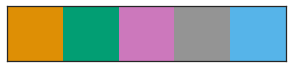

In [127]:
from operator import itemgetter
palette = itemgetter(1, 2, 4, 7, 9)(sns.color_palette('colorblind'))
sns.palplot(palette)

In [18]:
df_hg38_ints

,sample_name,num_peaks_hichip_peaks,avg_peak_size_hichip_peaks,num_peaks_fithichip,avg_peak_size_fithichip,num_peaks_chipseq,avg_peak_size_chipseq,chipseq_path
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,968,18837.628099,29430,174.444852,90971,547.053676,293T-PDS.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,1801,29690.376458,73184,187.952298,93587,549.467747,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
2,293T.GSE128106.Homo_Sapiens.YY1.b1,43,21189.976744,987,183.697062,119725,500.863337,293T.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,2661,1281.321308,11489,265.430151,115154,630.902669,A673-siCT-Dh1-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,3468,1323.914360,10428,255.292386,115154,630.902669,A673-siCT-Dh1-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,823,1086.366950,7761,265.823734,102935,615.880789,A673-siSA2-Dh6-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,2205,1375.680726,23228,247.107327,102935,615.880789,A673-siSA2-Dh6-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,49,2554.061224,9018,207.311377,104318,601.596963,A673-siSA2-Dh8-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,46,1515.434783,27484,216.063164,104318,601.596963,A673-siSA2-Dh8-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,29585,2240.566571,60295,386.202189,-1,-1.000000,NaN


In [37]:
def PlotPeakCalls_Matplotlib(genomes, df_hg38, df_t2t, df_mm10, what):
    
    sns.set_style("white")
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 4), layout="constrained")
    
    for i, genome in enumerate(genomes):
        if genome == "hg38":
            d = df_hg38_ints
            #n = 100000
            n = 5000
        elif genome == "t2t":
            d = df_t2t_ints
        else:
            d = df_mm10_ints
            #n = 100000
            n = 4000
        
        if what == "number":
            col1 = 'num_peaks_fithichip'
            col2 = 'num_peaks_hichip_peaks'
            title = 'Number of Peaks'
        elif what == "size":
            col1 = 'avg_peak_size_fithichip'
            col2 = 'avg_peak_size_hichip_peaks'
            col3 = 'avg_peak_size_chipseq'
            title = "Peak Size (bp)"
        
        columns = ['sample_name', col1]
        fi_num_df = d[columns]
        fi_num_df = fi_num_df.loc[fi_num_df[col1] > 0].reset_index(drop=True)
        num_fi_samples = len(fi_num_df)
        fi_num_df = fi_num_df.loc[fi_num_df[col1] <= n].reset_index(drop=True)
        fi_num_df.columns = ['Tool', title]
        fi_num_df = fi_num_df.assign(Tool='FitHiChIP\n{s} samples\nmedian = {m}'.format(s = num_fi_samples, m = int(np.median(list(fi_num_df[title])))))
        num_zero_peaks_f = len(d.loc[d[col1] == 0])
        num_na_peaks_f = len(d.loc[d[col1] == -1])
        num_value_f = len(d) - num_zero_peaks_f - num_na_peaks_f

        columns = ['sample_name', col2]
        hp_num_df = d[columns]
        hp_num_df = hp_num_df.loc[hp_num_df[col2] > 0].reset_index(drop=True)
        num_hp_samples = len(hp_num_df)
        hp_num_df = hp_num_df.loc[hp_num_df[col2] <= n].reset_index(drop=True)
        hp_num_df.columns = ['Tool', title]
        hp_num_df = hp_num_df.assign(Tool='HiChIP-Peaks\n{s} samples\nmedian = {m}'.format(s = num_hp_samples, m = int(np.median(list(hp_num_df[title])))))
        num_zero_peaks_h = len(d.loc[d[col2] == 0])
        num_na_peaks_h = len(d.loc[d[col2] == -1])
        num_value_h = len(d) - num_zero_peaks_h - num_na_peaks_h
        
        columns = ['sample_name', col3]
        ch_num_df = d[columns]
        ch_num_df = ch_num_df.loc[ch_num_df[col3] > 0].reset_index(drop=True)
        num_ch_samples = len(ch_num_df)
        ch_num_df = ch_num_df.loc[ch_num_df[col3] <= n].reset_index(drop=True)
        ch_num_df.columns = ['Tool', title]
        ch_num_df = ch_num_df.assign(Tool='ChIPLine\n{s} samples\nmedian = {m}'.format(s = num_ch_samples, m = int(np.median(list(ch_num_df[title])))))
        num_zero_peaks_c = len(d.loc[d[col3] == 0])
        num_na_peaks_c = len(d.loc[d[col3] == -1])
        num_value_c = len(d) - num_zero_peaks_c - num_na_peaks_c

        num_df = pd.concat([fi_num_df, hp_num_df, ch_num_df], ignore_index=True)
        
        #axs[i].text(0.66, 0.89, 'median (FT) = {}'.format(int(np.median(list(fi_num_df["Number of Peaks"])))), transform=axs[i].transAxes)
        #axs[i].text(0.66, 0.81, 'median (HP) = {}'.format(int(np.median(list(ch_num_df["Number of Peaks"])))), transform=axs[i].transAxes)
        axs[i].title.set_text(genome)
        f = sns.violinplot(data=num_df, x="Tool", y=title, cut=0, ax = axs[i], palette=itemgetter(0,3,2)(palette), linewidth=0.8)
        f.set(xlabel=None)
    #fig.suptitle('HiChIP-Inferred Peaks', size=16)
    fig.savefig("figures/manuscript/hichip-inferred_size_peaks_V2", dpi=1000, bbox_inches='tight')

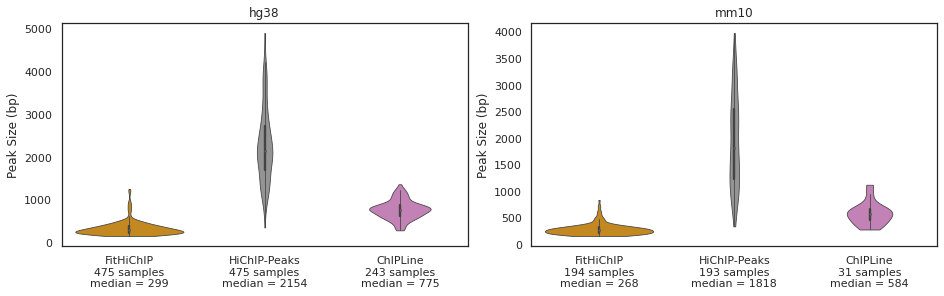

In [38]:
PlotPeakCalls_Matplotlib(["hg38", "mm10"], df_hg38_ints, df_t2t_ints, df_mm10_ints, "size")

In [442]:
def PlotPeakCalls_Matplotlib(genomes, df_hg38, df_t2t, df_mm10, what):
    
    sns.set_style("white")
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), layout="constrained")
    
    for i, genome in enumerate(genomes):
        if genome == "hg38":
            d = df_hg38_ints
            n = float("inf")
        elif genome == "t2t":
            d = df_t2t_ints
            n = float("inf")
        else:
            d = df_mm10_ints
            n = float("inf")
            
        if what == "number":
            col1 = 'num_peaks_fithichip'
            col2 = 'num_peaks_chipseq'
            title = 'Number of Peaks'
        elif what == "size":
            col1 = 'avg_peak_size_fithichip'
            col2 = 'avg_peak_size_chipseq'
            title = "Peak Size (bp)"
        
        columns = ['sample_name', col1]
        fi_num_df = d[columns]
        fi_num_df = fi_num_df.loc[fi_num_df[col1] > 0].reset_index(drop=True)
        num_fi_samples = len(fi_num_df)
        fi_num_df = fi_num_df.loc[fi_num_df[col1] <= n].reset_index(drop=True)
        fi_num_df.columns = ['Tool', title]
        fi_num_df = fi_num_df.assign(Tool='FitHiChIP\n{s} samples\nmedian = {m}'.format(s = len(fi_num_df), m = int(np.median(list(fi_num_df[title])))))
        num_zero_peaks_f = len(d.loc[d[col1] == 0])
        num_na_peaks_f = len(d.loc[d[col1] == -1])
        num_value_f = len(d) - num_zero_peaks_f - num_na_peaks_f

        columns = ['sample_name', col2]
        ch_num_df = d[columns]
        ch_num_df = ch_num_df.loc[ch_num_df[col2] > 0].reset_index(drop=True)
        num_ch_samples = len(ch_num_df)
        ch_num_df = ch_num_df.loc[ch_num_df[col2] <= n].reset_index(drop=True)
        ch_num_df.columns = ['Tool', title]
        ch_num_df = ch_num_df.assign(Tool='ChIPLine\n{s} samples\nmedian = {m}'.format(s = len(ch_num_df), m = int(np.median(list(ch_num_df[title])))))
        num_zero_peaks_c = len(d.loc[d[col2] == 0])
        num_na_peaks_c = len(d.loc[d[col2] == -1])
        num_value_c = len(d) - num_zero_peaks_c - num_na_peaks_c

        num_df = pd.concat([fi_num_df, ch_num_df], ignore_index=True)
        
        #axs[i].text(0.04, 0.91, 'median (FT) = {}'.format(int(np.median(list(fi_num_df["Number of Peaks"])))), transform=axs[i].transAxes)
        #axs[i].text(0.04, 0.83, 'median (CP) = {}'.format(int(np.median(list(ch_num_df["Number of Peaks"])))), transform=axs[i].transAxes)
        axs[i].title.set_text(genome)
        sns.violinplot(data=num_df, x="Tool", y=title, cut=0, ax = axs[i], palette=itemgetter(0,2)(palette), linewidth=0.8)
    
    #fig.suptitle('HiChIP-Inferred Peaks vs. ChIP-seq Peaks', size=16)
    fig.savefig("figures/manuscript/hichip-inferredVchipseq_num_peaks", dpi=1000, bbox_inches='tight')    

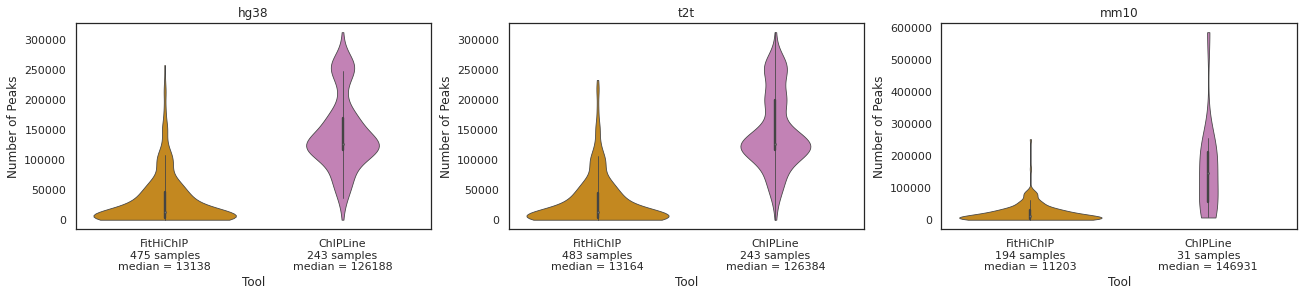

In [443]:
PlotPeakCalls_Matplotlib(["hg38", "t2t", "mm10"], df_hg38_ints, df_t2t_ints, df_mm10_ints, "number")

### % recall

In [117]:
def read_overlaps(file):
    overlaps = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):
                overlaps = overlaps + 1
    return int(overlaps)

In [118]:
def create_overlaps_df(genome):
    data_f = []
    data_hp = []
    date = "04_25_2023"
    sample_files = glob.glob('results/peaks/overlaps/' + date + '/*chipseq.' + genome + '.bed')
    samples = []
    for sample in sample_files:
        s = sample.split('/')[4].split('.chipseq')[0]
        samples.append(s)
    
    for s in samples:
        sample_name = s
        sample_info_f = []
        sample_info_hp = []
        sample_info_f.append(sample_name)
        sample_info_hp.append(sample_name)
        chipseq_file = 'results/peaks/overlaps/'+ date + '/' + sample_name + '.chipseq.' + genome + '.bed'
        num_chipseq = read_overlaps(chipseq_file)
        sample_info_f.append(num_chipseq)
        sample_info_hp.append(num_chipseq)
        
        ## get number of peaks
        hichip_peaks_path='results/peaks/hichip-peaks/{sn}/out_peaks.bed'.format(sn = sample_name)
        if os.path.exists(hichip_peaks_path):
            peak_info = read_peak_files(hichip_peaks_path)
            sample_info_hp.append(int(len(peak_info)))
        else:
            sample_info_hp.append(-1)
            
        fithichip_path='results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
        if os.path.exists(fithichip_path):
            peak_info = read_peak_files(fithichip_path)
            sample_info_f.append(int(len(peak_info)))
        else:
            sample_info_f.append(-1)
        
        
        ## read overlaps with hp file
        hp_file = 'results/peaks/overlaps/'+ date + '/' + sample_name + '.chipseq.hichip_peaks.uniq.' + genome + '.txt'
        if os.path.exists(hp_file):
            num_overlaps = read_overlaps(hp_file)         
            sample_info_hp.append(num_overlaps)
            sample_info_hp.append((num_overlaps / num_chipseq) * 100)
        
        ## read overlaps with f file
        f_file = 'results/peaks/overlaps/'+ date + '/' + sample_name + '.chipseq.fithichip.uniq.' + genome + '.txt'
        if os.path.exists(f_file):
            num_overlaps = read_overlaps(f_file)
            sample_info_f.append(num_overlaps)
            sample_info_f.append((num_overlaps / num_chipseq) * 100)
    
        data_f.append(sample_info_f)
        data_hp.append(sample_info_hp)
            
    df_f = pd.DataFrame(data_f)
    df_hp = pd.DataFrame(data_hp)
    return df_f, df_hp

In [41]:
f_df_mm10, hp_df_mm10 = create_overlaps_df("mm10")

f_df_mm10.columns = ['sample_name', 'num_chipseq', "num_peaks", 'num_chipseq_by_peaks', 'per_recall_chipseq_by_peaks']
f_df_mm10 = f_df_mm10.sort_values(by=['sample_name'], ascending=True).reset_index(drop=True)
hp_df_mm10.columns = ['sample_name', 'num_chipseq', "num_peaks", 'num_chipseq_by_peaks', 'per_recall_chipseq_by_peaks']
hp_df_mm10 = hp_df_mm10.sort_values(by=['sample_name'], ascending=True).reset_index(drop=True)

f_df_mm10 = f_df_mm10.loc[f_df_mm10["num_peaks"] > 0]
hp_df_mm10 = hp_df_mm10.loc[hp_df_mm10["num_peaks"] > 0]

f_df_mm10 = f_df_mm10.assign(Tool='FitHiChIP')
hp_df_mm10 = hp_df_mm10.assign(Tool='HiChIP-Peaks')

In [42]:
f_df_mm10.describe()

,num_chipseq,num_peaks,num_chipseq_by_peaks,per_recall_chipseq_by_peaks
count,31.000000,31.000000,31.000000,31.000000
mean,153777.870968,17162.580645,9573.580645,14.341324
std,141584.898194,15380.652467,9948.624842,18.937042
min,6980.000000,709.000000,624.000000,0.306247
25%,54107.000000,4033.500000,2343.000000,1.747625
50%,146931.000000,10523.000000,4246.000000,6.412341
75%,212824.000000,29608.000000,12972.000000,19.002529
max,587075.000000,52981.000000,37074.000000,71.520556


In [43]:
hp_df_mm10.describe()

,num_chipseq,num_peaks,num_chipseq_by_peaks,per_recall_chipseq_by_peaks
count,31.000000,31.000000,31.000000,31.000000
mean,153777.870968,1870.903226,3131.451613,6.319107
std,141584.898194,4113.115813,7991.497310,16.251837
min,6980.000000,7.000000,2.000000,0.001386
25%,54107.000000,16.500000,10.500000,0.005131
50%,146931.000000,21.000000,16.000000,0.011719
75%,212824.000000,351.000000,303.000000,0.220928
max,587075.000000,15531.000000,35505.000000,62.781137


In [44]:
df_mm10 = pd.concat([f_df_mm10, hp_df_mm10], ignore_index=True)

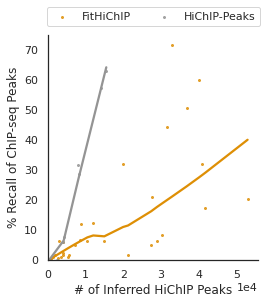

In [108]:
sns.set_style("white")
palette = itemgetter(1, 7, 2, 4, 7, 9)(sns.color_palette('colorblind')) 
sns.set_palette(palette)
ax = sns.lmplot(x='num_peaks',y='per_recall_chipseq_by_peaks', data=df_mm10, lowess=True, ci=None, hue = "Tool", height = 4, aspect = 1, scatter_kws={"s": 4});
ax.set(ylim=(0, 75))
ax.set(xlim=(0, None))
ax.set_xlabels("# of Inferred HiChIP Peaks")
ax.set_ylabels("% Recall of ChIP-seq Peaks")
for v in ax.axes.flatten(): v.ticklabel_format(style='scientific', scilimits=(0,0), axis='x')
#ax.fig.suptitle("mm10")
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.45, 1.07), frameon=True, title=None, ncol=2)
ax.savefig("figures/manuscript/percent_recall_num_peaks_mm10_V2", dpi=1000, bbox_inches='tight')    

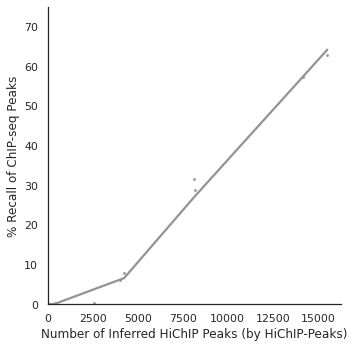

In [79]:
sns.set_style("white")
palette = itemgetter(7, 1, 2, 4, 7, 9)(sns.color_palette('colorblind')) 
sns.set_palette(palette)
ax = sns.lmplot(x='num_peaks',y='per_recall_chipseq_by_peaks', data=hp_df_mm10, lowess=True, ci=None, scatter_kws={"s": 4});
ax.set(ylim=(0, 75))
ax.set(xlim=(0, None))
ax.set_xlabels("Number of Inferred HiChIP Peaks (by HiChIP-Peaks)")
ax.set_ylabels("% Recall of ChIP-seq Peaks")
ax.savefig("figures/manuscript/percent_recall_num_peaks_hp_mm10", dpi=1000, bbox_inches='tight')    

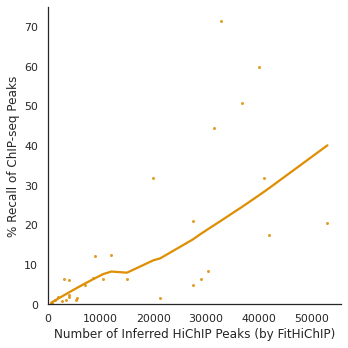

In [80]:
sns.set_style("white")
palette = itemgetter(1, 2, 4, 7, 9)(sns.color_palette('colorblind')) 
sns.set_palette(palette)
ax = sns.lmplot(x='num_peaks',y='per_recall_chipseq_by_peaks', data=f_df_mm10, lowess=True, ci=None, scatter_kws={"s": 4});
ax.set(ylim=(0, 75))
ax.set(xlim=(0, None))
ax.set_xlabels("Number of Inferred HiChIP Peaks (by FitHiChIP)")
ax.set_ylabels("% Recall of ChIP-seq Peaks")
ax.savefig("figures/manuscript/percent_recall_num_peaks_f_mm10", dpi=1000, bbox_inches='tight')    

In [54]:
f_df_hg38, hp_df_hg38 = create_overlaps_df("hg38")

f_df_hg38.columns = ['sample_name', 'num_chipseq', "num_peaks", 'num_chipseq_by_peaks', 'per_recall_chipseq_by_peaks']
f_df_hg38 = f_df_hg38.sort_values(by=['sample_name'], ascending=True).reset_index(drop=True)
hp_df_hg38.columns = ['sample_name', 'num_chipseq', "num_peaks", 'num_chipseq_by_peaks', 'per_recall_chipseq_by_peaks']
hp_df_hg38 = hp_df_hg38.sort_values(by=['sample_name'], ascending=True).reset_index(drop=True)

f_df_hg38 = f_df_hg38.loc[f_df_hg38["num_peaks"] > 0]
hp_df_hg38 = hp_df_hg38.loc[hp_df_hg38["num_peaks"] > 0]

f_df_hg38 = f_df_hg38.assign(Tool='FitHiChIP')
hp_df_hg38 = hp_df_hg38.assign(Tool='HiChIP-Peaks')

In [55]:
f_df_hg38.describe()

,num_chipseq,num_peaks,num_chipseq_by_peaks,per_recall_chipseq_by_peaks
count,239.000000,239.000000,239.000000,239.000000
mean,143052.723849,19983.121339,13232.736402,12.865944
std,61111.211970,37901.134143,21651.647990,20.763352
min,38.000000,8.000000,8.000000,0.004716
25%,115157.000000,1566.000000,1347.500000,0.895353
50%,124318.000000,6250.000000,5223.000000,3.855575
75%,169621.000000,13791.500000,11900.500000,11.034198
max,311562.000000,211860.000000,128225.000000,97.368421


In [56]:
hp_df_hg38.describe()

,num_chipseq,num_peaks,num_chipseq_by_peaks,per_recall_chipseq_by_peaks
count,239.000000,239.000000,239.000000,239.000000
mean,143052.723849,9930.891213,14449.857741,13.838870
std,61111.211970,13236.051747,19839.638730,21.314492
min,38.000000,1.000000,1.000000,0.000590
25%,115157.000000,537.500000,705.500000,0.627237
50%,124318.000000,5675.000000,8328.000000,5.451978
75%,169621.000000,10251.500000,15080.000000,12.403403
max,311562.000000,70440.000000,109357.000000,100.000000


In [119]:
df = pd.concat([f_df_hg38, hp_df_hg38], ignore_index=True)

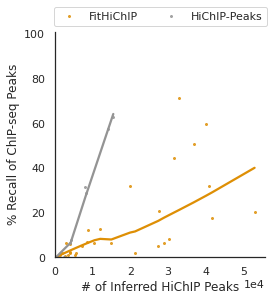

In [113]:
sns.set_style("white")
palette = itemgetter(1, 7, 2, 4, 7, 9)(sns.color_palette('colorblind')) 
sns.set_palette(palette)
ax = sns.lmplot(x='num_peaks',y='per_recall_chipseq_by_peaks', data=df, lowess=True, ci=None, hue = "Tool", height = 4, aspect = 1, scatter_kws={"s": 4});
ax.set(ylim=(0, 101))
ax.set(xlim=(0, None))
ax.set_xlabels("# of Inferred HiChIP Peaks")
ax.set_ylabels("% Recall of ChIP-seq Peaks")
for v in ax.axes.flatten(): v.ticklabel_format(style='scientific', scilimits=(0,0), axis='x')
#ax.fig.suptitle("hg38")
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.45, 1.06), frameon=True, title=None, ncol=2)
ax.savefig("figures/manuscript/percent_recall_num_peaks_hg38_V2", dpi=1000, bbox_inches='tight')    

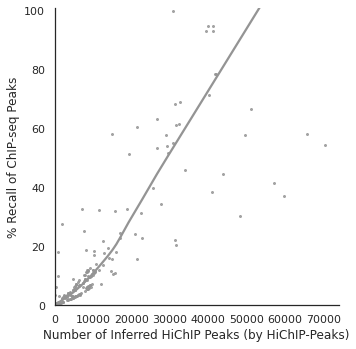

In [50]:
sns.set_style("white")
palette = itemgetter(7, 1, 2, 4, 7, 9)(sns.color_palette('colorblind')) 
sns.set_palette(palette)
ax = sns.lmplot(x='num_peaks',y='per_recall_chipseq_by_peaks', data=hp_df_hg38, lowess=True, ci=None, scatter_kws={"s": 4});
ax.set(ylim=(0, 101))
ax.set(xlim=(0, None))
ax.set_xlabels("Number of Inferred HiChIP Peaks (by HiChIP-Peaks)")
ax.set_ylabels("% Recall of ChIP-seq Peaks")
#ax.savefig("figures/manuscript/percent_recall_num_peaks_hp", dpi=1000, bbox_inches='tight')    

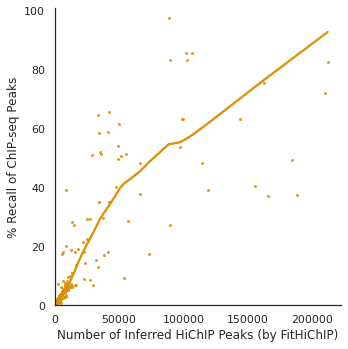

In [51]:
sns.set_style("white")
palette = itemgetter(1, 2, 4, 7, 9)(sns.color_palette('colorblind')) 
sns.set_palette(palette)
ax = sns.lmplot(x='num_peaks',y='per_recall_chipseq_by_peaks', data=f_df_hg38, lowess=True, ci=None, scatter_kws={"s": 4});
ax.set(ylim=(0, 101))
ax.set(xlim=(0, None))
ax.set_xlabels("Number of Inferred HiChIP Peaks (by FitHiChIP)")
ax.set_ylabels("% Recall of ChIP-seq Peaks")
#ax.savefig("figures/manuscript/percent_recall_num_peaks_f", dpi=1000, bbox_inches='tight')    

In [120]:
df_hg38 = df.copy()

In [157]:
def PlotPeakCalls_Matplotlib(genomes, df_hg38, df_mm10, what):
    
    sns.set_style("white")
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7, 4), layout="constrained")
    
    for i, genome in enumerate(genomes):
        if genome == "hg38":
            d = df_hg38
            n = float("inf")
        elif genome == "t2t":
            d = df_t2t
            n = float("inf")
        else:
            d = df_mm10
            n = float("inf")
            
        if what == "recall":
            col1 = 'per_recall_chipseq_by_peaks'
            col2 = 'per_recall_chipseq_by_peaks'
            title = 'Percent Recall of Corresponding ChIP-seq (%)'
        
        columns = ['sample_name', "per_recall_chipseq_by_peaks"]
        fi_num_df = d[columns].loc[d["Tool"] == "FitHiChIP"]
        fi_num_df = fi_num_df.loc[fi_num_df[col1] > 0].reset_index(drop=True)
        fi_num_df = fi_num_df.loc[fi_num_df[col1] <= n].reset_index(drop=True)
        fi_num_df.columns = ['Tool', title]
        fi_num_df = fi_num_df.assign(Tool='FitHiChIP\nn = {s} samples\nmedian = {m}'.format(s = len(fi_num_df), m = str(round(np.median(list(fi_num_df[title])), 2)) + "%"))
        num_zero_peaks_f = len(d.loc[d[col1] == 0])
        num_na_peaks_f = len(d.loc[d[col1] == -1])
        num_value_f = len(d) - num_zero_peaks_f - num_na_peaks_f

        #columns = ['sample_name', col2]
        ch_num_df = d[columns].loc[d["Tool"] == "HiChIP-Peaks"]
        ch_num_df = ch_num_df.loc[ch_num_df[col2] > 0].reset_index(drop=True)
        ch_num_df = ch_num_df.loc[ch_num_df[col2] <= n].reset_index(drop=True)
        ch_num_df.columns = ['Tool', title]
        ch_num_df = ch_num_df.assign(Tool='HiChIP-Peaks\nn = {s} samples\nmedian = {m}'.format(s = len(ch_num_df), m = str(round(np.median(list(ch_num_df[title])), 2)) + "%"))
        num_zero_peaks_c = len(d.loc[d[col2] == 0])
        num_na_peaks_c = len(d.loc[d[col2] == -1])
        num_value_c = len(d) - num_zero_peaks_c - num_na_peaks_c

        num_df = pd.concat([fi_num_df, ch_num_df], ignore_index=True)
        
        #axs[i].text(0.04, 0.91, 'median (FT) = {}'.format(int(np.median(list(fi_num_df["Number of Peaks"])))), transform=axs[i].transAxes)
        #axs[i].text(0.04, 0.83, 'median (CP) = {}'.format(int(np.median(list(ch_num_df["Number of Peaks"])))), transform=axs[i].transAxes)
        #axs[i].title.set_text(genome)
        c = sns.violinplot(data=num_df, x="Tool", y=title, cut=0, ax = axs[i], palette=itemgetter(0,3)(palette), linewidth=0.8)
        c.set(xlabel=None)
        
    #fig.suptitle('HiChIP-Inferred Peaks vs. ChIP-seq Peaks', size=16)
    fig.savefig("figures/manuscript/hichip-inferred_recall_peaks_with_slop_V2", dpi=1000, bbox_inches='tight')    

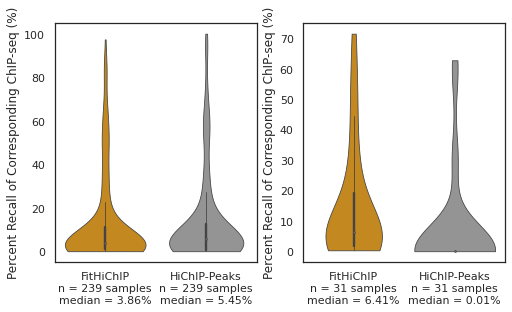

In [158]:
# with slop
PlotPeakCalls_Matplotlib(["hg38", "mm10"], df_hg38, df_mm10, "recall")

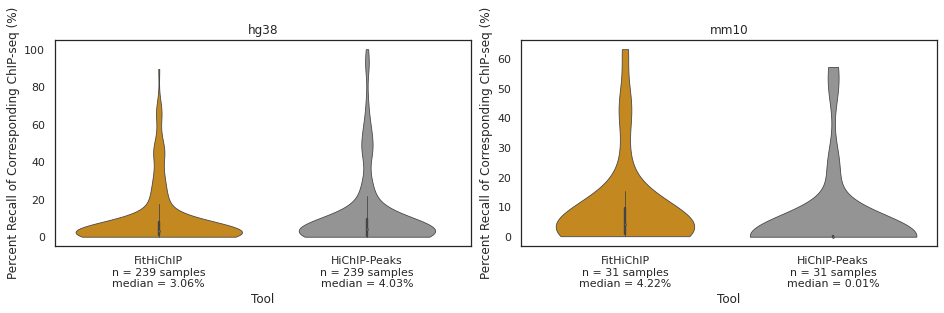

In [471]:
# without slop
PlotPeakCalls_Matplotlib(["hg38", "mm10"], o_df_hg38, o_df_mm10, "recall")

In [86]:
df_mm10.loc[df_mm10["num_peaks"] > df_mm10["num_chipseq"]]

,sample_name,num_chipseq,num_peaks,num_chipseq_by_peaks,per_recall_chipseq_by_peaks,Tool
13,BMDM_Basal.GSE159629.Mus_Musculus.H3K4me3.b2,33080,36844,16773,50.704353,FitHiChIP
18,Erythroid_0hr.GSE142004.Mus_Musculus.YY1.b1,6980,40999,2225,31.876791,FitHiChIP
19,Erythroid_0hr.GSE142004.Mus_Musculus.YY1.b2,6980,19982,2225,31.876791,FitHiChIP
20,Erythroid_1hr.GSE142004.Mus_Musculus.YY1.b1,19947,27577,4170,20.905399,FitHiChIP


In [87]:
df_hg38.loc[df_hg38["num_peaks"] > df_hg38["num_chipseq"]]

,sample_name,num_chipseq,num_peaks,num_chipseq_by_peaks,per_recall_chipseq_by_peaks,Tool
9,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,163779,210112,117796.0,71.923751,FitHiChIP
75,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,155067,162519,116800.0,75.322280,FitHiChIP
81,H9.GSE105028.Homo_Sapiens.Rad21.b1,155146,211860,128225.0,82.647957,FitHiChIP
82,HCT116-AuxinNeg.GSE179544.Homo_Sapiens.RNA-Pol-II.b1,36242,187824,13571.0,37.445505,FitHiChIP
84,HCT116.GSE136629.Homo_Sapiens.H3K27ac.b1,38,88486,37.0,97.368421,FitHiChIP
90,HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF.b1,118265,119315,46430.0,39.259291,FitHiChIP
92,Hela-S3-Control.GSE108869.Homo_Sapiens.CTCF.b1,145609,183853,71893.0,49.374008,FitHiChIP
106,MDA-MB-231-PVT1sgRNAR2.GSE97585.Homo_Sapiens.H3K27ac.b1,70803,106715,60537.0,85.500614,FitHiChIP
107,MDA-MB-231-PVT1sgRNAR2.GSE97585.Homo_Sapiens.H3K27ac.b2,70803,102300,60537.0,85.500614,FitHiChIP
108,MDA-MB-231-PVT1sgRNAR3.GSE97585.Homo_Sapiens.H3K27ac.b1,70713,102570,58907.0,83.304343,FitHiChIP


#### Test GM12878 with ENCODE ChIP-seq Peaks

In [118]:
f_df_test, hp_df_test = create_overlaps_df("hg38")

f_df_test.columns = ['sample_name', 'num_chipseq', "num_peaks", 'num_chipseq_by_peaks', 'per_recall_chipseq_by_peaks']
f_df_test = f_df_test.sort_values(by=['sample_name'], ascending=True).reset_index(drop=True)
hp_df_test.columns = ['sample_name', 'num_chipseq', "num_peaks", 'num_chipseq_by_peaks', 'per_recall_chipseq_by_peaks']
hp_df_test = hp_df_test.sort_values(by=['sample_name'], ascending=True).reset_index(drop=True)

f_df_test = f_df_test.loc[f_df_test["num_peaks"] > 0]
hp_df_test = hp_df_test.loc[hp_df_test["num_peaks"] > 0]

f_df_test = f_df_test.assign(Tool='FitHiChIP')
hp_df_test = hp_df_test.assign(Tool='HiChIP-Peaks')

In [119]:
df = pd.concat([f_df_test, hp_df_test], ignore_index=True)

In [120]:
#df.columns = ["sample_name", "num_chipseq_peaks", "num_inferred_peaks", "num_chipseq_peaks_recalled", "%_recall", "Tool"]
df

,sample_name,num_chipseq,num_peaks,num_chipseq_by_peaks,per_recall_chipseq_by_peaks,Tool
0,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1,52455,144756,42582,81.178153,FitHiChIP
1,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2,52455,130147,41663,79.426175,FitHiChIP
2,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1,52455,44846,44513,84.859403,HiChIP-Peaks
3,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2,52455,43232,44205,84.272233,HiChIP-Peaks


In [121]:
df_new = pd.concat([f_df_hg38, hp_df_hg38, df], ignore_index=True)

In [138]:
df_new

,sample_name,num_chipseq,num_peaks,num_chipseq_by_peaks,per_recall_chipseq_by_peaks,Tool
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,90971,29430,6200.0,6.815359,FitHiChIP
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,93587,73184,16205.0,17.315439,FitHiChIP
2,293T.GSE128106.Homo_Sapiens.YY1.b1,119725,987,600.0,0.501148,FitHiChIP
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,115154,11489,11453.0,9.945812,FitHiChIP
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,115154,10428,10873.0,9.442138,FitHiChIP
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,102935,7761,7831.0,7.607714,FitHiChIP
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,102935,23228,14919.0,14.493612,FitHiChIP
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,104318,9018,4890.0,4.687590,FitHiChIP
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,104318,27484,8984.0,8.612128,FitHiChIP
9,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,163779,210112,117796.0,71.923751,FitHiChIP


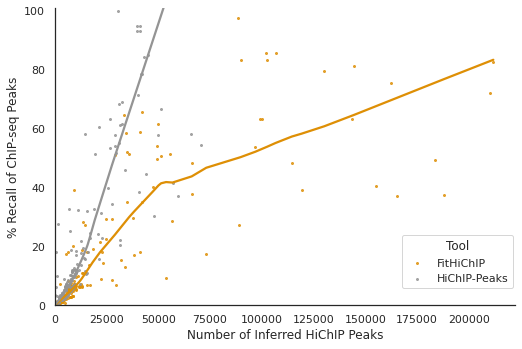

In [123]:
sns.set_style("white")
palette = itemgetter(1, 7, 2, 4, 7, 9)(sns.color_palette('colorblind')) 
sns.set_palette(palette)
ax = sns.lmplot(x='num_peaks',y='per_recall_chipseq_by_peaks', data=df_new, lowess=True, ci=None, hue = "Tool", height = 5, aspect = 1.5, scatter_kws={"s": 4});
ax.set(ylim=(0, 101))
ax.set(xlim=(0, None))
ax.set_xlabels("Number of Inferred HiChIP Peaks")
ax.set_ylabels("% Recall of ChIP-seq Peaks")
sns.move_legend(ax, "lower center",bbox_to_anchor=(.73, 0.17), frameon=True)

In [124]:
df_new

,sample_name,num_chipseq,num_peaks,num_chipseq_by_peaks,per_recall_chipseq_by_peaks,Tool
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,90971,29430,6200.0,6.815359,FitHiChIP
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,93587,73184,16205.0,17.315439,FitHiChIP
2,293T.GSE128106.Homo_Sapiens.YY1.b1,119725,987,600.0,0.501148,FitHiChIP
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,115154,11489,11453.0,9.945812,FitHiChIP
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,115154,10428,10873.0,9.442138,FitHiChIP
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,102935,7761,7831.0,7.607714,FitHiChIP
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,102935,23228,14919.0,14.493612,FitHiChIP
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,104318,9018,4890.0,4.687590,FitHiChIP
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,104318,27484,8984.0,8.612128,FitHiChIP
9,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,163779,210112,117796.0,71.923751,FitHiChIP


In [149]:
def sequencing_depth(sample):
    samplesheet = "results/samplesheets/post-hicpro/human_updated_0314.peaks_files.samplesheet.without_header.tsv"
    with open(samplesheet) as s:
        for line in s:
            if line.strip().split("\t")[0] == sample:
                vp = line.strip().split("\t")[1]
                with open(vp) as v:
                    count = 0
                    for line in v:
                        count = count + 1
                return count

In [150]:
df_new["sequencing_depth"] = df_new.apply(lambda x : int(sequencing_depth(x["sample_name"])), axis = 1)

In [151]:
df_new

,sample_name,num_chipseq,num_peaks,num_chipseq_by_peaks,per_recall_chipseq_by_peaks,Tool,sequencing_depth
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,90971,29430,6200.0,6.815359,FitHiChIP,3014685
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,93587,73184,16205.0,17.315439,FitHiChIP,4869234
2,293T.GSE128106.Homo_Sapiens.YY1.b1,119725,987,600.0,0.501148,FitHiChIP,1110646
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,115154,11489,11453.0,9.945812,FitHiChIP,53512756
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,115154,10428,10873.0,9.442138,FitHiChIP,25675978
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,102935,7761,7831.0,7.607714,FitHiChIP,51460797
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,102935,23228,14919.0,14.493612,FitHiChIP,30643463
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,104318,9018,4890.0,4.687590,FitHiChIP,43442814
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,104318,27484,8984.0,8.612128,FitHiChIP,32594833
9,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,163779,210112,117796.0,71.923751,FitHiChIP,49418834


In [166]:
df_new.loc[df_new.sample_name.str.contains("GM")]

,sample_name,num_chipseq,num_peaks,num_chipseq_by_peaks,per_recall_chipseq_by_peaks,Tool,sequencing_depth
478,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1,52455,144756,42582.0,81.178153,FitHiChIP,91034016
479,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2,52455,130147,41663.0,79.426175,FitHiChIP,87191705
480,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1,52455,44846,44513.0,84.859403,HiChIP-Peaks,91034016
481,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2,52455,43232,44205.0,84.272233,HiChIP-Peaks,87191705


Text(0, 0.5, '% Recall of ChIP-seq Peaks')

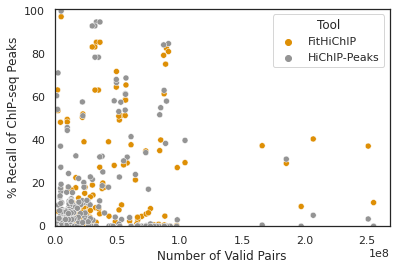

In [163]:
sns.set_style("white")
palette = itemgetter(1, 7, 2, 4, 7, 9)(sns.color_palette('colorblind')) 
sns.set_palette(palette)
ax = sns.scatterplot(x='sequencing_depth',y='per_recall_chipseq_by_peaks', data=df_new, hue = "Tool");
ax.set(ylim=(0, 101))
ax.set(xlim=(0, None))
plt.xlabel("Number of Valid Pairs")
plt.ylabel("% Recall of ChIP-seq Peaks")

Text(0, 0.5, '% Recall of ChIP-seq Peaks')

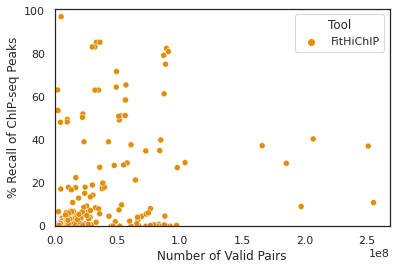

In [164]:
sns.set_style("white")
palette = itemgetter(1, 7, 2, 4, 7, 9)(sns.color_palette('colorblind')) 
sns.set_palette(palette)
ax = sns.scatterplot(x='sequencing_depth',y='per_recall_chipseq_by_peaks', data=df_new.loc[df_new["Tool"] == "FitHiChIP"], hue = "Tool");
ax.set(ylim=(0, 101))
ax.set(xlim=(0, None))
plt.xlabel("Number of Valid Pairs")
plt.ylabel("% Recall of ChIP-seq Peaks")

Text(0, 0.5, '% Recall of ChIP-seq Peaks')

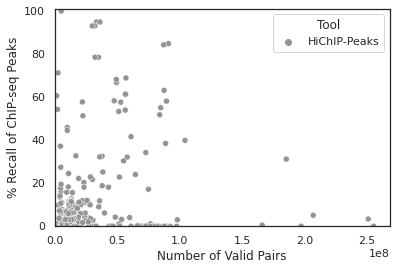

In [165]:
sns.set_style("white")
palette = itemgetter(7, 1, 2, 4, 7, 9)(sns.color_palette('colorblind')) 
sns.set_palette(palette)
ax = sns.scatterplot(x='sequencing_depth',y='per_recall_chipseq_by_peaks', data=df_new.loc[df_new["Tool"] == "HiChIP-Peaks"], hue = "Tool");
ax.set(ylim=(0, 101))
ax.set(xlim=(0, None))
plt.xlabel("Number of Valid Pairs")
plt.ylabel("% Recall of ChIP-seq Peaks")

#### Peak Span All Samples

In [127]:
df.columns = ["sample_name", "num_peaks_hichip_peaks","sum_size_hichip_peaks", "num_peaks_fithichip","sum_size_fithichip", "num_peaks_chipseq","sum_size_chipseq", "chipseq_path"]
df = df.sort_values(by="sample_name").reset_index(drop=True)

ValueError: Length mismatch: Expected axis has 6 elements, new values have 8 elements

In [97]:
df = df_mm10.copy()

In [89]:
def get_peak_span(sample, tool):
    if tool == "FitHiChIP":
        fithichip_path = 'results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample)
        if os.path.exists(fithichip_path):
            peak_info = read_peak_files(fithichip_path)
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            return sum(peak_sizes)
        
    elif tool == "HiChIP-Peaks":
        hichip_peaks_path = 'results/peaks/hichip-peaks/{sn}/out_peaks.bed'.format(sn = sample)
        if os.path.exists(hichip_peaks_path):
            peak_info = read_peak_files(hichip_peaks_path)
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            return sum(peak_sizes)       

In [98]:
df["peak_span"] = df.apply(lambda x : get_peak_span(x["sample_name"], x["Tool"]), axis = 1)

In [99]:
df

,sample_name,num_chipseq,num_peaks,num_chipseq_by_peaks,per_recall_chipseq_by_peaks,Tool,peak_span
0,3T3_Norm.GSE178344.Mus_Musculus.SMC1A.b1,256560,30262,21334,8.315404,FitHiChIP,7132349
1,3T3_TCF1.GSE178344.Mus_Musculus.SMC1A.b1,196265,41815,34417,17.535985,FitHiChIP,11261143
2,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3.b1,203757,775,624,0.306247,FitHiChIP,157175
3,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3.b2,203757,709,624,0.306247,FitHiChIP,143214
4,AML12_shSafb.GSE141113.Mus_Musculus.H3K9me3.b1,238302,2741,1841,0.772549,FitHiChIP,499436
5,AML12_shSafb.GSE141113.Mus_Musculus.H3K9me3.b2,238302,3548,2407,1.010063,FitHiChIP,650958
6,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac.b1,587075,5514,10019,1.706596,FitHiChIP,1449764
7,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac.b2,587075,21307,10019,1.706596,FitHiChIP,5426611
8,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A.b1,216405,27467,10757,4.970772,FitHiChIP,5433061
9,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A.b2,216405,7117,10757,4.970772,FitHiChIP,1403997


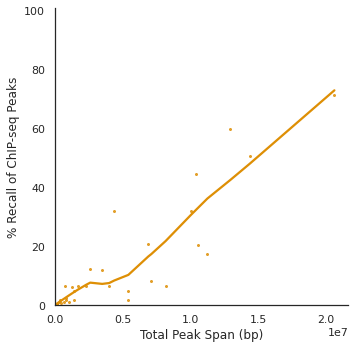

In [139]:
sns.set_style("white")
palette = itemgetter(1, 1, 2, 4, 7, 9)(sns.color_palette('colorblind')) 
sns.set_palette(palette)
ax = sns.lmplot(x='peak_span',y='per_recall_chipseq_by_peaks', data=df.loc[df["Tool"] == "FitHiChIP"], lowess=True, ci=None, scatter_kws={"s": 4});
ax.set(ylim=(0, 101))
ax.set(xlim=(0, None))
ax.set_xlabels("Total Peak Span (bp)")
ax.set_ylabels("% Recall of ChIP-seq Peaks")
#ax.savefig("figures/manuscript/percent_recall_num_peaks_hp", dpi=1000, bbox_inches='tight')    

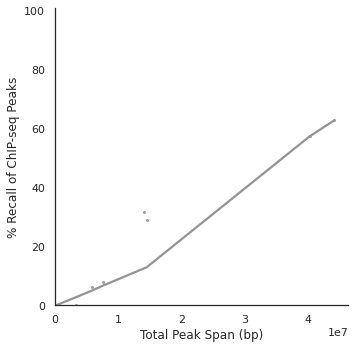

In [140]:
sns.set_style("white")
palette = itemgetter(7, 1, 2, 4, 7, 9)(sns.color_palette('colorblind')) 
sns.set_palette(palette)
ax = sns.lmplot(x='peak_span',y='per_recall_chipseq_by_peaks', data=df.loc[df["Tool"] == "HiChIP-Peaks"], lowess=True, ci=None, scatter_kws={"s": 4});
ax.set(ylim=(0, 101))
ax.set(xlim=(0, None))
ax.set_xlabels("Total Peak Span (bp)")
ax.set_ylabels("% Recall of ChIP-seq Peaks")
#ax.savefig("figures/manuscript/percent_recall_num_peaks_hp", dpi=1000, bbox_inches='tight')    

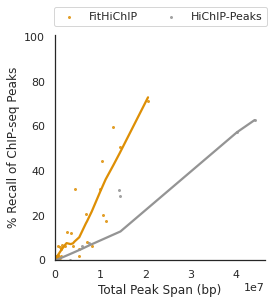

In [102]:
sns.set_style("white")
palette = itemgetter(1, 7, 2, 4, 7, 9)(sns.color_palette('colorblind')) 
sns.set_palette(palette)
ax = sns.lmplot(x='peak_span',y='per_recall_chipseq_by_peaks', data=df, hue="Tool", lowess=True, ci=None, height = 4, aspect = 1, scatter_kws={"s": 4});
ax.set(ylim=(0, 101))
ax.set(xlim=(0, None))
ax.set_xlabels("Total Peak Span (bp)")
ax.set_ylabels("% Recall of ChIP-seq Peaks")
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.45, 1.07), frameon=True, title=None, ncol=2)
#.fig.suptitle("mm10")
ax.savefig("figures/manuscript/percent_recall_peak_span_mm10_V2.png", dpi=1000, bbox_inches='tight')    

# Generate Sample-Specific Plots

#### peak sizes

In [33]:
def get_outliers(ps_df):
    
    Q1 = ps_df['peak_sizes_bp'].quantile(0.25)
    Q3 = ps_df['peak_sizes_bp'].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    print("Outliers Report")
    print("IQR:", IQR)
    
    outliers_low = ps_df.peak_sizes_bp < lower_lim
    outliers_high = ps_df.peak_sizes_bp > upper_lim
    outliers_low_df = ps_df.loc[outliers_low,:]
    outliers_high_df = ps_df.loc[outliers_high,:]
    print("num_outliers_low:", len(outliers_low_df))
    print("num_outliers_high:", len(outliers_high_df))
    print("percent_total_peaks_that_are_outliers:", round(((len(outliers_high_df) + len(outliers_low_df)) / len(ps_df) * 100), 2), "%")
    
    ps_df_no_outliers = ps_df[~(outliers_low | outliers_high)]
    
    return ps_df_no_outliers

In [34]:
def gen_peak_sizes_plot(sample_name, peak_type):
    
    if peak_type == "FitHiChIP": 
        peaks_path = 'results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
    if peak_type == "HiChIP_Peaks":
        peaks_path = 'results/peaks/hichip-peaks/{sn}/out_peaks.bed'.format(sn = sample_name)
    if peak_type == "ChIP_Seq":
        peaks_path = get_chipseq_path('results/samplesheets/post-hicpro/human_updated_0314.peaks_files.samplesheet.without_header.tsv', sample_name)
        
    if os.path.exists(peaks_path):
        if peak_type == "FithiChIP" or peak_type == "HiChIP_Peaks": 
            peak_info = read_peak_files(peaks_path)    
        else:
            peak_info = read_chipseq_files(peaks_path)
            
        peak_sizes = []
        for peak in peak_info.items():
            peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
        ps_df = pd.DataFrame(peak_sizes)
        ps_df.columns = ['peak_sizes_bp']
        
    print("Peak Sizes Report (before outliers dropped)")
    print(ps_df.describe())
    print()
    
    ps_df_no_outliers = get_outliers(ps_df)
    
    sns.set(rc = {'figure.figsize':(25,8)})
    sns.set_theme(style="whitegrid")
    font1 = {'color':'black','size':20}
    font2 = {'color':'black','size':15}
    plt.title(peak_type + " Peak Sizes Distribution: " + sample_name + " (Outliers Dropped)", fontdict = font1)
    plt.xlabel("Peak Size (bp)", fontdict = font2)
    plt.ylabel("Number of Samples", fontdict = font2)

    ps_plot = sns.histplot(data=ps_df_no_outliers, bins=100, x="peak_sizes_bp", color='#fa8072')
    fig = ps_plot.get_figure()
    fig.savefig('sample_peak_dist2.png', dpi=300)
    return ps_plot

Peak Sizes Report (before outliers dropped)
       peak_sizes_bp
count   51221.000000
mean     3132.609535
std      3013.077518
min         7.000000
25%      1467.000000
50%      2421.000000
75%      3813.000000
max     78049.000000

Outliers Report
IQR: 2346.0
num_outliers_low: 0
num_outliers_high: 3141
percent_total_peaks_that_are_outliers: 6.13 %


<AxesSubplot:title={'center':'HiChIP_Peaks Peak Sizes Distribution: Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1 (Outliers Dropped)'}, xlabel='Peak Size (bp)', ylabel='Number of Samples'>

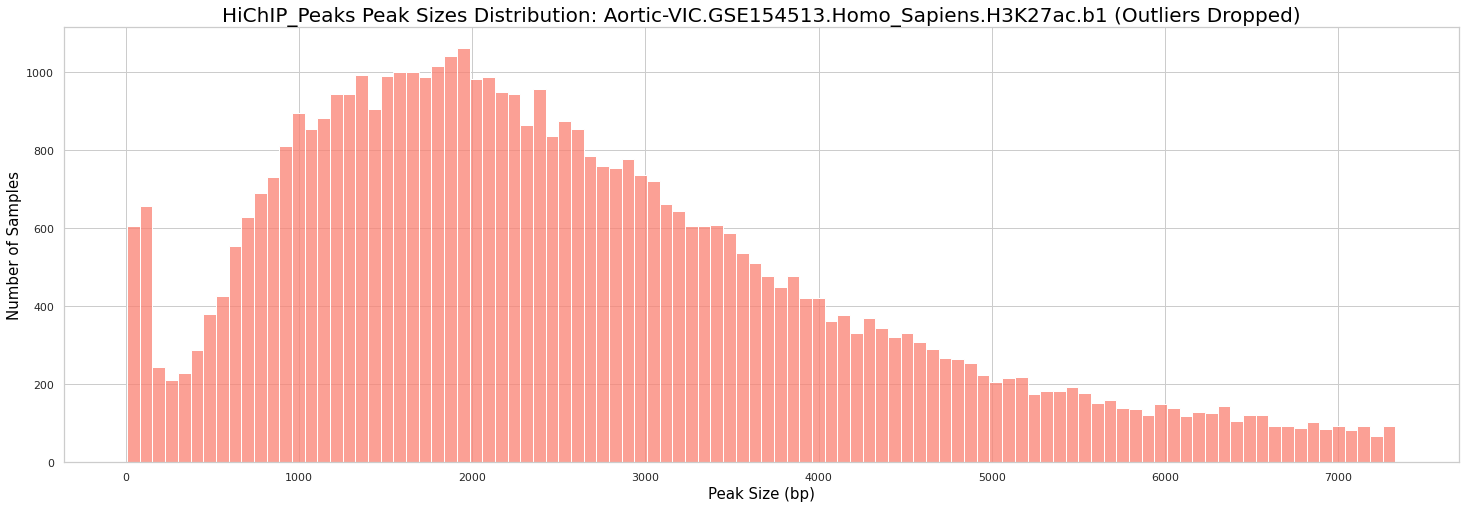

In [35]:
gen_peak_sizes_plot('Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1', 'HiChIP_Peaks')

Peak Sizes Report (before outliers dropped)
       peak_sizes_bp
count  210112.000000
mean      388.569696
std       341.728160
min       147.000000
25%       179.000000
50%       250.000000
75%       440.000000
max      3959.000000

Outliers Report
IQR: 261.0
num_outliers_low: 0
num_outliers_high: 21286
percent_total_peaks_that_are_outliers: 10.13 %


<AxesSubplot:title={'center':'FitHiChIP Peak Sizes Distribution: Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1 (Outliers Dropped)'}, xlabel='Peak Size (bp)', ylabel='Number of Samples'>

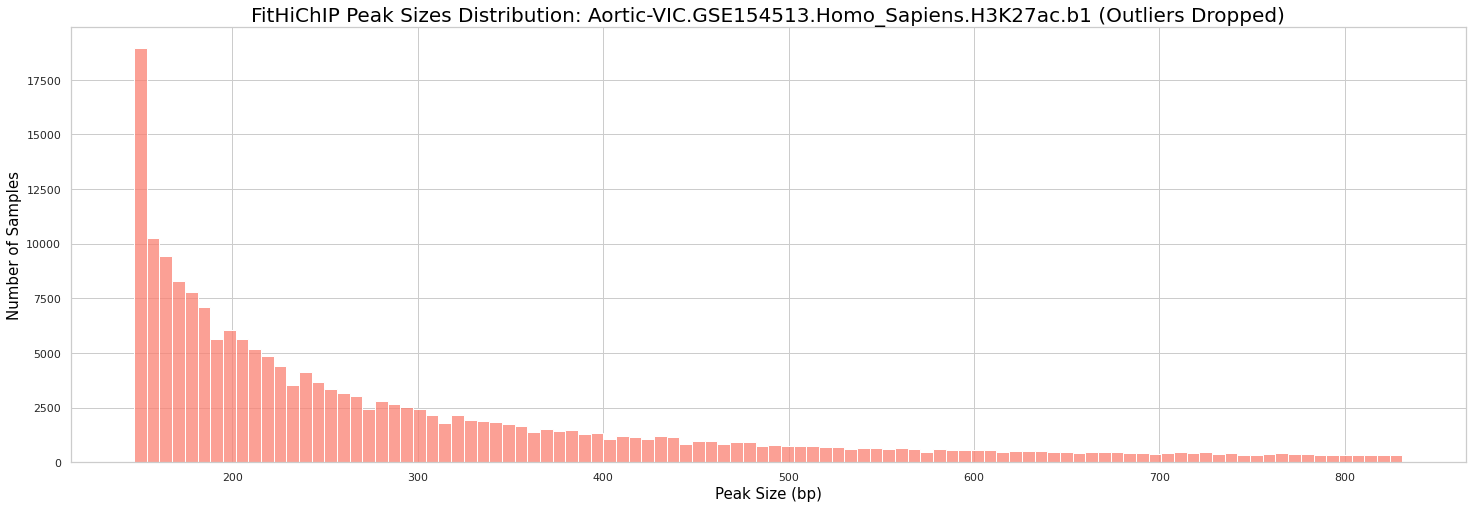

In [36]:
gen_peak_sizes_plot('Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1', 'FitHiChIP')

Peak Sizes Report (before outliers dropped)
       peak_sizes_bp
count  163779.000000
mean      657.534684
std       753.876251
min       200.000000
25%       252.000000
50%       384.000000
75%       726.000000
max     26766.000000

Outliers Report
IQR: 474.0
num_outliers_low: 0
num_outliers_high: 16518
percent_total_peaks_that_are_outliers: 10.09 %


<AxesSubplot:title={'center':'ChIP_Seq Peak Sizes Distribution: Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1 (Outliers Dropped)'}, xlabel='Peak Size (bp)', ylabel='Number of Samples'>

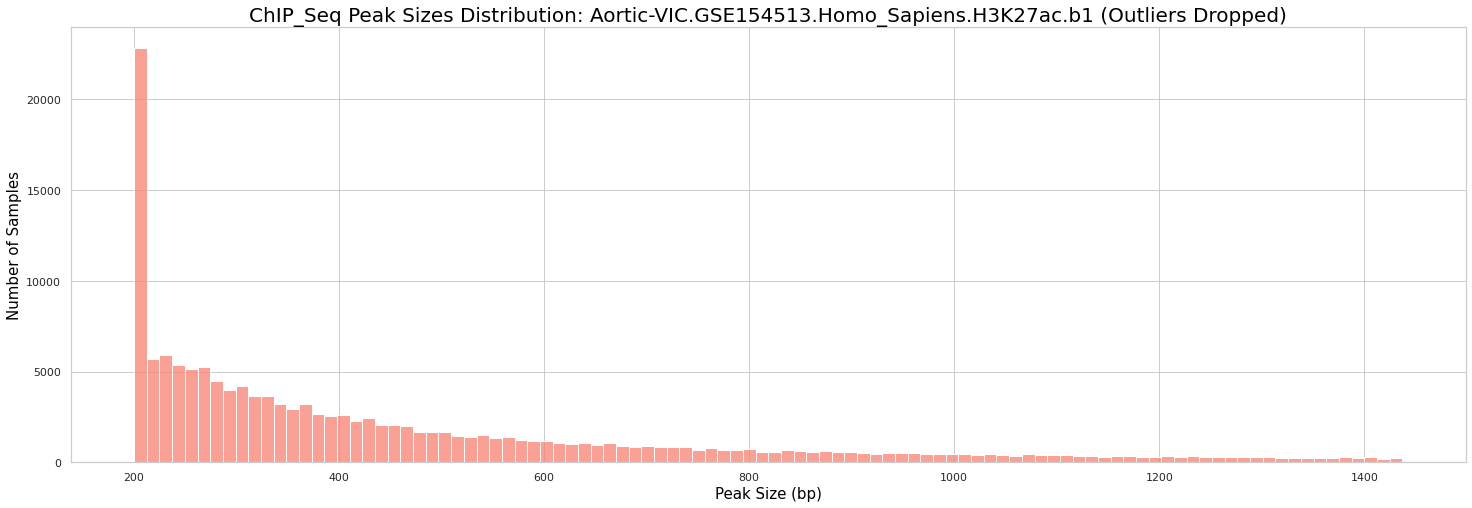

In [37]:
gen_peak_sizes_plot('Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1', 'ChIP_Seq')

#### overlaps, percent recall

In [87]:
def read_overlaps(file):
    overlaps = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):     
                info = line.strip().split()
                overlaps = overlaps + 1
    return overlaps

In [88]:
def create_overlaps_df():
    data = []
    sample_files = glob.glob('results/peaks/overlaps/no_slop_recall/*')
    samples = []
    for sample in sample_files:
        s = sample.split('/')[4].split('.overlaps')[0]
        if s not in samples:
            samples.append(s)
    
    for s in samples:
        sample_name = s
        sample_info = []
        sample_info.append(sample_name)
        chipseq_file = get_chipseq_path('results/samplesheets/post-hicpro/peaks_files.samplesheet.without_header.tsv', sample_name)
        
        ## read overlaps with hp file
        hp_file = 'results/peaks/overlaps/no_slop_recall/{sn}.overlaps.chipseq.hp.nodups.txt'.format(sn = sample_name)
        if os.path.exists(hp_file):
            num_overlaps = read_overlaps(hp_file)
            num_chipseq_peaks = read_overlaps(chipseq_file)
            
            sample_info.append(num_overlaps)
            sample_info.append(num_chipseq_peaks)
            sample_info.append((num_overlaps / num_chipseq_peaks) * 100)
        
        ## read overlaps with f file
        f_file = 'results/peaks/overlaps/no_slop_recall/{sn}.overlaps.chipseq.f.nodups.txt'.format(sn = sample_name)
        if os.path.exists(f_file):
            num_overlaps = read_overlaps(f_file)
            
            sample_info.append(num_overlaps)
            sample_info.append(num_chipseq_peaks)
            sample_info.append((num_overlaps / num_chipseq_peaks) * 100)
        
        data.append(sample_info)
            
    df = pd.DataFrame(data)
    return df

In [ ]:
o_df = create_overlaps_df()

In [95]:
o_df.columns = ['sample_name', 'num_csp_w_hp_overlap', 'num_csp', '%_recall_hp_csp', 'num_csp_w_f_overlap', 'num_csp', '%_recall_f_csp']
o_df = o_df.sort_values(by=['sample_name'], ascending=True).reset_index(drop=True)
o_df.describe()

,num_csp_w_hp_overlap,num_csp,%_recall_hp_csp,num_csp_w_f_overlap,num_csp,%_recall_f_csp
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,7941.550847,98072.864407,14.012254,6707.076271,98072.864407,13.038284
std,15290.704274,50247.273696,26.015760,12970.841804,50247.273696,24.492064
min,0.000000,38.000000,0.000000,0.000000,38.000000,0.000000
25%,286.000000,61173.000000,0.363033,420.250000,61173.000000,0.371993
50%,2791.500000,99593.000000,3.117808,1252.000000,99593.000000,1.700240
75%,5534.500000,136321.000000,8.245904,5342.250000,136321.000000,10.013001
max,96306.000000,311562.000000,100.000000,75469.000000,311562.000000,98.108313


Text(0, 0.5, 'Percent Recall of ChIP-Seq Peaks by HiChIP-Peaks')

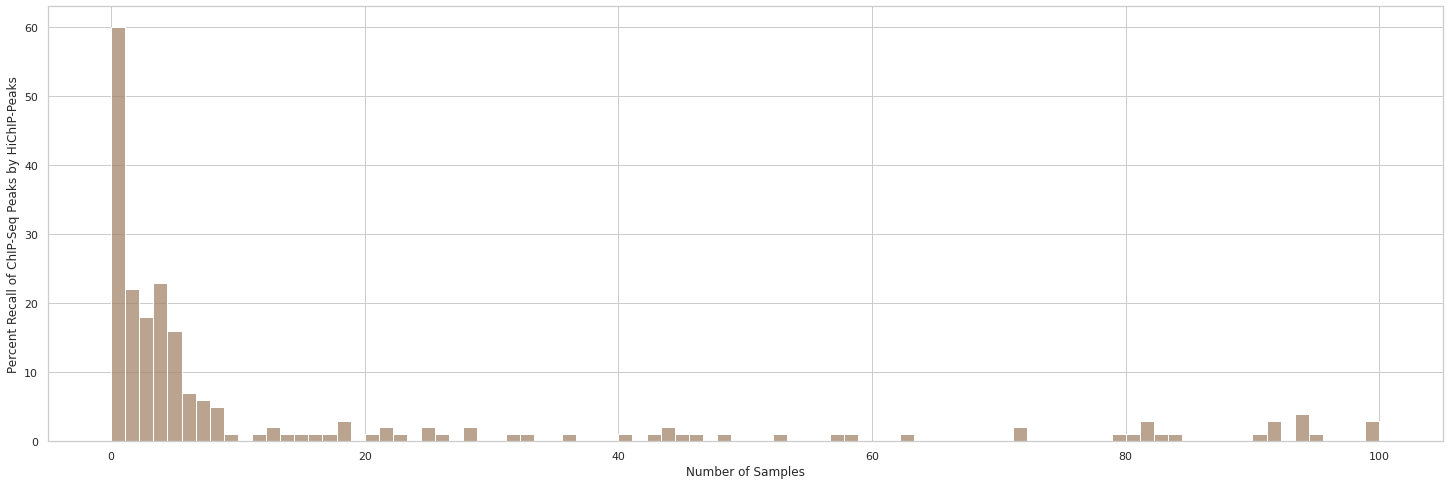

In [69]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
ax = sns.histplot(data=o_df, bins=90, x="%_recall_hp_csp", color='#A3866A')
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Percent Recall of ChIP-Seq Peaks by HiChIP-Peaks')

Text(0, 0.5, 'Percent Recall of ChIP-Seq Peaks by FitHiChIP')

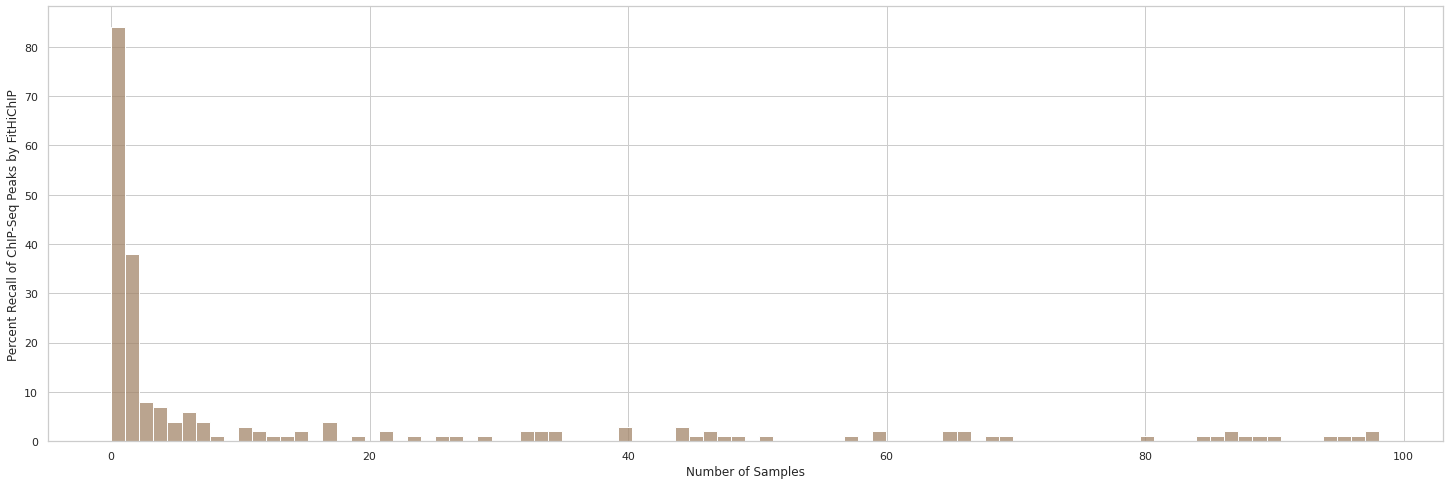

In [71]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
ax = sns.histplot(data=o_df, bins=90, x="%_recall_f_csp", color='#A3866A')
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Percent Recall of ChIP-Seq Peaks by FitHiChIP')